**Note:** This script simply explores the distribution of the prediction target.

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
data_dir = "data"

calendar_df = pd.read_csv(f"{data_dir}/calendar.csv")
sales_train_evaluation_df = pd.read_csv(f"{data_dir}/sales_train_evaluation.csv")
sample_submission_df = pd.read_csv(f"{data_dir}/sample_submission.csv")
sell_prices_df = pd.read_csv(f"{data_dir}/sell_prices.csv")

# Exploring the data

In [4]:
calendar_df

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0


In [5]:
sell_prices_df

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
...,...,...,...,...
6841116,WI_3,FOODS_3_827,11617,1.00
6841117,WI_3,FOODS_3_827,11618,1.00
6841118,WI_3,FOODS_3_827,11619,1.00
6841119,WI_3,FOODS_3_827,11620,1.00


In [6]:
sales_train_evaluation_df

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,1,0,3,0,1,1,0,0,1,1
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,0,0,1,2,0,1,0,1,0,2
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,1,1,4,6,0,1,1,1,0


In [8]:
sales_train_evaluation_df.iloc[0]

id          HOBBIES_1_001_CA_1_evaluation
item_id                     HOBBIES_1_001
dept_id                         HOBBIES_1
cat_id                            HOBBIES
store_id                             CA_1
                        ...              
d_1937                                  0
d_1938                                  3
d_1939                                  3
d_1940                                  0
d_1941                                  1
Name: 0, Length: 1947, dtype: object

In [11]:
d_cols = sales_train_evaluation_df.loc[:, sales_train_evaluation_df.columns.str.startswith('d_')]

d_cols

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,0,0,0,0,0,0,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,0,0,0,0,0,0,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,0,0,2,2,0,3,1,4,1,0,...,1,0,3,0,1,1,0,0,1,1
30486,0,0,0,0,0,5,0,1,1,3,...,0,0,0,0,0,0,1,0,1,0
30487,0,6,0,2,2,4,1,8,5,2,...,0,0,1,2,0,1,0,1,0,2
30488,0,0,0,0,0,0,0,0,0,0,...,1,1,1,4,6,0,1,1,1,0


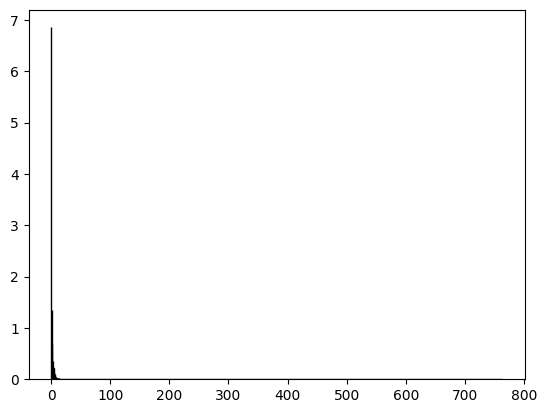

In [37]:
data = d_cols.values.flatten()
n_bins = int(len(data)**0.5)

plt.hist(data, bins=n_bins, density=True, color='skyblue', edgecolor='black')
plt.show()

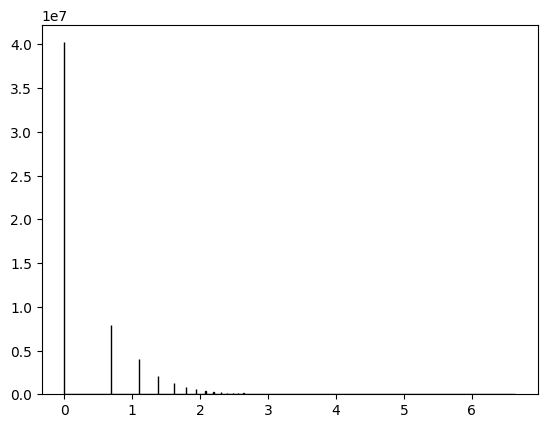

In [36]:
plt.hist(np.log(data+1), bins=n_bins, color='skyblue', edgecolor='black')
plt.show()

In [ ]:
data.mean(), data.std(), data.min(), data.max()

(np.float64(1.1308878055473464),
 np.float64(3.8700380872055162),
 np.int64(0),
 np.int64(763))

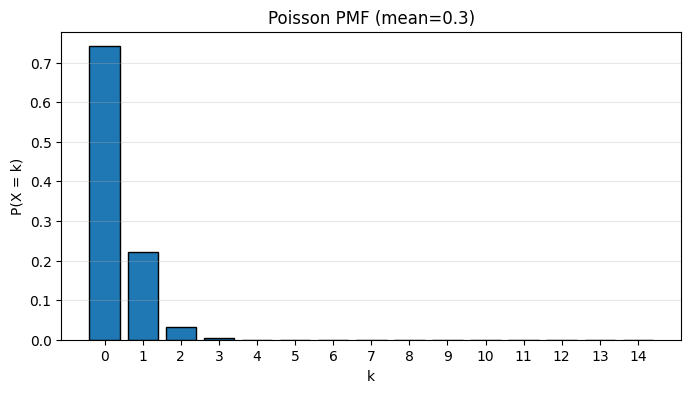

In [25]:
# Plot Poisson PMF (mean = 1.13)
mu = 0.3
import matplotlib.pyplot as plt
import numpy as np
from math import exp, factorial

k = np.arange(0, 15)
pmf = np.array([mu**i * exp(-mu) / factorial(i) for i in k])

plt.figure(figsize=(8,4))
plt.bar(k, pmf, color='C0', edgecolor='k')
plt.xlabel('k')
plt.ylabel('P(X = k)')
plt.title(f'Poisson PMF (mean={mu})')
plt.xticks(k)
plt.grid(axis='y', alpha=0.3)
plt.show()

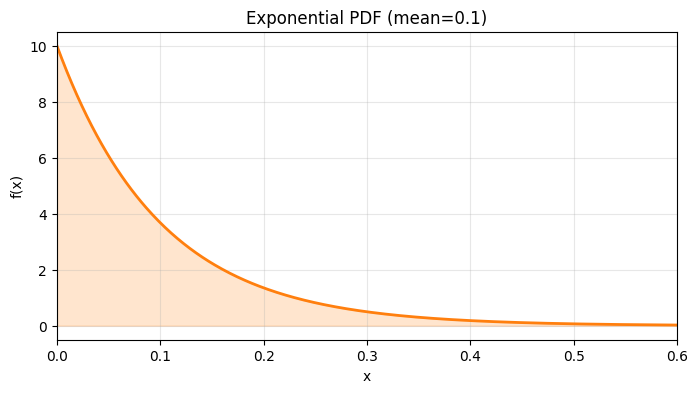

In [33]:
# Plot Exponential PDF (mean = 1.13)
mean = 0.1
import numpy as np
import matplotlib.pyplot as plt

# rate (lambda) = 1/mean
lam = 1.0 / mean
x = np.linspace(0, mean * 6, 500)
pdf = lam * np.exp(-lam * x)

plt.figure(figsize=(8,4))
plt.plot(x, pdf, lw=2, color='C1')
plt.fill_between(x, pdf, color='C1', alpha=0.2)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f'Exponential PDF (mean={mean})')
plt.grid(alpha=0.3)
plt.xlim(0, x.max())
plt.show()